# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БВТ2005 Камышев Владимир
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

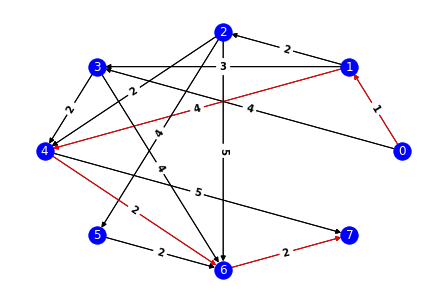

In [3]:
#Алгоритм Флойда-Уоршелла

import networkx as nx
import numpy as np
import heapq as hq
import math

with open('l6.txt') as f:
    matrix = [list(map(int, row.split())) for row in f.readlines()]
G = nx.from_numpy_matrix(np.matrix(matrix), create_using=nx.DiGraph)
for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 0:
                matrix[i][j] = math.inf             

m = len(matrix)
for i in range(m):
    for j in range(i+1,m):
        matrix[i][i],matrix[j][j] = 0,0

paths = []
for i in range(len(matrix)):
    paths.append([])
    for j in range(len(matrix)):
        if matrix[i][j] != 0 and matrix[i][j] != math.inf:
            paths[i].append(j)
        else:
            paths[i].append(-1)            
for k in range(len(matrix)):
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][k] != math.inf and matrix[k][j] != math.inf and matrix[i][j] > matrix[i][k] + matrix[k][j]:
                matrix[i][j] = matrix[i][k] + matrix[k][j]
                paths[i][j] = paths[i][k]


start = 0
end = 7

path = [start]
while path[-1] != end:
    path.append(paths[path[-1]][end])

    
colors = None
if path:
    colors = []
    for item in G.edges():
        try:
            index1 = path.index(item[0])
            index2 = path.index(item[1])
            if index1 + 1!= index2 and index1 - 1 != index2:
                raise
            colors.append('red')
        except:
            colors.append('black')
    pos = nx.circular_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels = True, node_color = 'blue', font_color = 'white')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, label_pos=0.5,
                                 font_color='black', font_size=10, font_weight='bold')
    nx.draw_networkx_edges(G ,edge_color = colors, pos = pos)

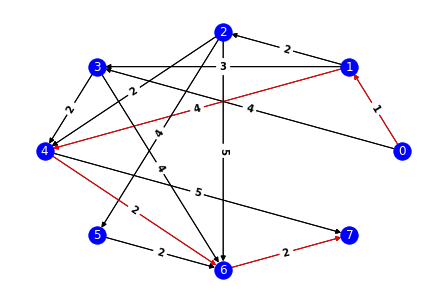

In [7]:
#Алгоритм Дейкстры

import networkx as nx
import numpy as np
import heapq as hq
import math

with open('l6.txt') as f:
    matrix = [list(map(int, row.split())) for row in f.readlines()]
G = nx.from_numpy_matrix(np.matrix(matrix), create_using=nx.DiGraph)
for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 0:
                matrix[i][j] = math.inf


def arg_min(T, S):
    amin = -1
    m = math.inf  # максимальное значение
    for i, t in enumerate(T):
        if t < m and i not in S:
            m = t
            amin = i

    return amin

def dijkstra(matrix, v):
    N = len(matrix)  # число вершин в графе
    T = [math.inf]*N   # последняя строка таблицы

           # стартовая вершина (нумерация с нуля)
    S = {v}     # просмотренные вершины
    T[v] = 0    # нулевой вес для стартовой вершины
    M = [0]*N   # оптимальные связи между вершинами

    while v != -1:          # цикл, пока не просмотрим все вершины
        for j, dw in enumerate(matrix[v]):   # перебираем все связанные вершины с вершиной v
            if j not in S:           # если вершина еще не просмотрена
                w = T[v] + dw
                if w < T[j]:
                    T[j] = w
                    M[j] = v        # связываем вершину j с вершиной v

        v = arg_min(T, S)            # выбираем следующий узел с наименьшим весом
        if v >= 0:                    # выбрана очередная вершина
            S.add(v)                 # добавляем новую вершину в рассмотрение


# формирование оптимального маршрута:
    start = 0
    end = 7
    P = [end]
    while end != start:
        end = M[P[-1]]
        P.append(end)
    return S, P

done, path = dijkstra(matrix, 0)


colors = None
if path:
    colors = []
    for item in G.edges():
        try:
            index1 = path.index(item[0])
            index2 = path.index(item[1])
            if index1 + 1!= index2 and index1 - 1 != index2:
                raise
            colors.append('red')
        except:
            colors.append('black')
    pos = nx.circular_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels = True, node_color = 'blue', font_color = 'white')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, label_pos=0.5,
                                 font_color='black', font_size=10, font_weight='bold')
    nx.draw_networkx_edges(G ,edge_color = colors, pos = pos)


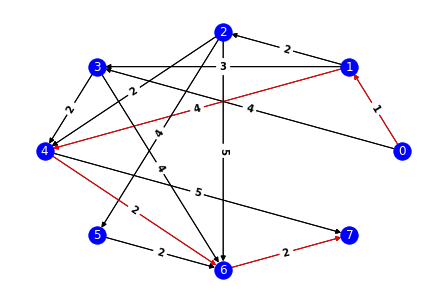

In [6]:
#Алгоритм Беллмана-Форда

import networkx as nx
import numpy as np
import heapq as hq
import math
    
with open('l6.txt') as f:
    matrix = [list(map(int, row.split())) for row in f.readlines()]
G = nx.from_numpy_matrix(np.matrix(matrix), create_using=nx.DiGraph)
for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 0:
                matrix[i][j] = math.inf

def bellman_ford(G, start):
    dist = [math.inf for item in matrix]
    dist[start] = 0
    paths = [[start] for item in matrix]
    for i in range(len(matrix)):
        for u in range(len(matrix)):
            for v in range(len(matrix)):
                if dist[u] != math.inf and matrix[u][v] != math.inf and dist[v] > dist[u] + matrix[u][v]:
                    dist[v] = dist[u] + matrix[u][v]
                    paths[v] = paths[u].copy()
                    paths[v].append(v)
    return dist, paths
dist, paths = bellman_ford(matrix, 0)


path = paths[7]
colors = None
if path:
    colors = []
    for item in G.edges():
        try:
            index1 = path.index(item[0])
            index2 = path.index(item[1])
            if index1 + 1 != index2 and index1 - 1 != index2:
                raise
            colors.append('red')
        except:
            colors.append('black')
    pos = nx.circular_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels = True, node_color = 'blue', font_color = 'white')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, label_pos=0.5,
                                 font_color='black', font_size=10, font_weight='bold')
    nx.draw_networkx_edges(G ,edge_color = colors, pos = pos)
                            


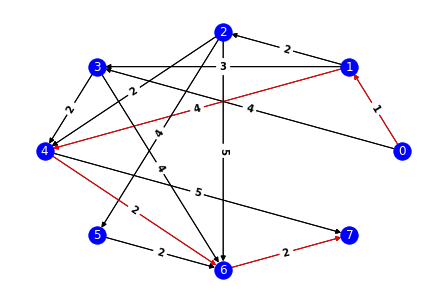

In [8]:
#Алгоритм Джонсона

import networkx as nx
import numpy as np
import heapq as hq
import math

with open('l6.txt') as f:
    matrix = [list(map(int, row.split())) for row in f.readlines()]
G = nx.from_numpy_matrix(np.matrix(matrix), create_using=nx.DiGraph)
for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 0:
                matrix[i][j] = math.inf  
                
nmatrix = matrix.copy()
for item in nmatrix:
    item.append(math.inf)
nmatrix.append([])
for i in range(len(nmatrix)):
    nmatrix[-1].append(0)
bell_dist, paths = bellman_ford(nmatrix, len(nmatrix) - 2)

for u in range(len(matrix)):
    for v in range(len(matrix)):
        if matrix[u][v] != math.inf and bell_dist[u] != math.inf and bell_dist[v] != math.inf:
            matrix[u][v] += bell_dist[u] - bell_dist[v]
matrix = np.delete(matrix, 8, 1)
ndist = []
npaths = []
for i in range(len(matrix)):
        dist, paths = dijkstra(matrix, i)
        ndist.append(list(dist))
        npaths.append(list(paths))


            
path = npaths[1]

colors = None
if path:
    colors = []
    for item in G.edges():
        try:
            index1 = path.index(item[0])
            index2 = path.index(item[1])
            if index1 + 1 != index2 and index1 - 1 != index2:
                raise
            colors.append('red')
        except:
            colors.append('black')
    pos = nx.circular_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels = True, node_color = 'blue', font_color = 'white')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, label_pos=0.5,
                                 font_color='black', font_size=10, font_weight='bold')
    nx.draw_networkx_edges(G ,edge_color = colors, pos = pos)

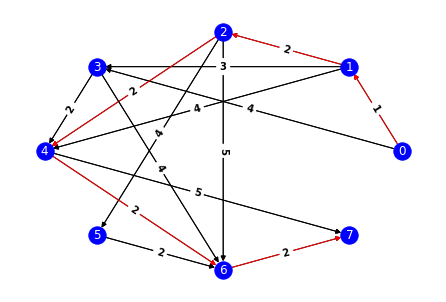

In [13]:
#Алгоритм Левита

import networkx as nx
import numpy as np
import heapq as hq
import math

with open('l6.txt') as f:
    matrix = [list(map(int, row.split())) for row in f.readlines()]
G = nx.from_numpy_matrix(np.matrix(matrix), create_using=nx.DiGraph)
for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 0:
                matrix[i][j] = math.inf             

m = len(matrix)
for i in range(m):
    for j in range(i+1,m):
        matrix[i][i],matrix[j][j] = 0,0

start = 0

dist = [math.inf for item in matrix]
dist[start] = 0
paths = [[start] for item in matrix]
m0 = set()
m1 = {'main': [start], 'urgent': []}
m2 = set(range(len(matrix)))
m2.remove(start)
while len(m1['main']) or len(m1['urgent']):
    u = None
    if len(m1['urgent']):
        u = m1['urgent'].pop(0)
    else:
        u = m1['main'].pop(0)
    for v in range(len(matrix)):
        if dist[u] == math.inf or matrix[u][v] == math.inf:
            continue
        if v in m2:
            m2.remove(v)
            m1['main'].append(v)
            dist[v] = min(dist[v], dist[u] + matrix[u][v])
            paths[v] = paths[u].copy()
            paths[v].append(v)
        elif v in m1['main'] or v in m1['urgent']:
            dist[v] = min(dist[v], dist[u] + matrix[u][v])
            paths[v] = paths[u].copy()
            paths[v].append(v)
        elif v in m0 and dist[v] > dist[u] + matrix[u][v]:
            m0.remove(v)
            m1['urgent'].append(v)
            dist[v] = dist[u] + matrix[u][v]
            paths[v] = paths[u].copy()
            paths[v].append(v)
    m0.add(u)
    

path = paths[7]
colors = None
if path:
    colors = []
    for item in G.edges():
        try:
            index1 = path.index(item[0])
            index2 = path.index(item[1])
            if index1 + 1 != index2 and index1 - 1 != index2:
                raise
            colors.append('red')
        except:
            colors.append('black')
    pos = nx.circular_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels = True, node_color = 'blue', font_color = 'white')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, label_pos=0.5,
                                 font_color='black', font_size=10, font_weight='bold')
    nx.draw_networkx_edges(G ,edge_color = colors, pos = pos)

<Figure size 432x288 with 0 Axes>

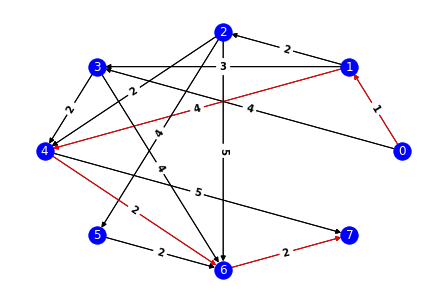

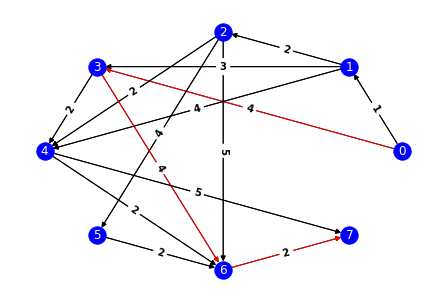

<Figure size 432x288 with 0 Axes>

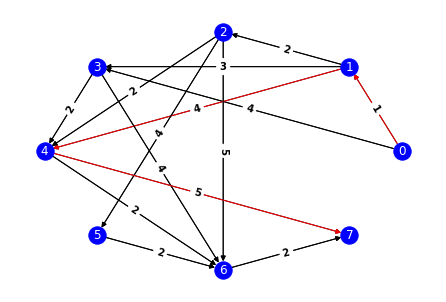

<Figure size 432x288 with 0 Axes>

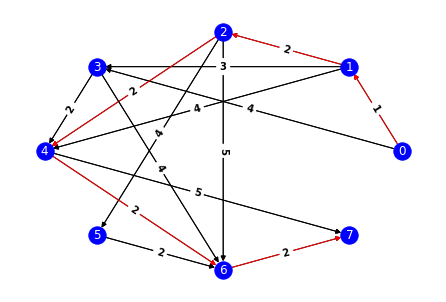

In [12]:
#Алгоритм Йена

import matplotlib.pyplot as plt

with open('l6.txt') as f:
    matrix = [list(map(int, row.split())) for row in f.readlines()]
for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 0:
                matrix[i][j] = math.inf             

m = len(matrix)
for i in range(m):
    for j in range(i+1,m):
        matrix[i][i],matrix[j][j] = 0,0




start = 0
end = 7
t = 5

candidates = set()
dists, paths = bellman_ford(matrix, start)
resultPaths = [paths[end]]
resultDists = [dists[end]]
    

for k in range(1, t):
    mat = matrix
    for i in range(len(resultPaths[-1]) - 1):
        spurNode = resultPaths[-1][i]
        rootPath = resultPaths[-1][:i + 1]
            
        for path in resultPaths:
            if rootPath == path[:i + 1]:
                mat[path[i]][path[i + 1]] = math.inf
            
        for node in rootPath:
            if node != spurNode:
                mat[node] = [math.inf for j in range(len(matrix))]

        dists, paths = bellman_ford(mat, spurNode)
            
        spurPath = paths[end][1:]
        if len(spurPath) == 0:
            continue
            
        totalPath = rootPath
        totalPath.extend(spurPath)
        totalPath = tuple(totalPath)
            
        totalDist = 0
        for j in range(1, len(totalPath)):
            totalDist += matrix[totalPath[j - 1]][totalPath[j]]
            
        candidates.add((totalPath, totalDist))
        
    if not len(candidates):
            break
        
    candidates_l = list(candidates)
    candidates_l.sort(key = lambda x: x[1])
        
    resultPaths.append(list(candidates_l[0][0]))
    resultDists.append(candidates_l[0][1])
        
    candidates.remove(candidates_l[0])
                    
for i in range(len(resultPaths)):
    colors = None
    if resultPaths[i]:
        with open('l6.txt') as f:
            newmat = [list(map(int, row.split())) for row in f.readlines()]
            plt.figure(i)
            G = nx.from_numpy_matrix(np.matrix(newmat), create_using=nx.DiGraph)
            plt.show()
        colors = []
        for item in G.edges():
            try:
                index1 = resultPaths[i].index(item[0])
                index2 = resultPaths[i].index(item[1])
                if index1 + 1 != index2 and index1 - 1 != index2:
                    raise
                colors.append('red')
            except:
                colors.append('black')
        pos = nx.circular_layout(G)
        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw(G, pos, with_labels = True, node_color = 'blue', font_color = 'white')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, label_pos=0.5,
                                     font_color='black', font_size=10, font_weight='bold')
        nx.draw_networkx_edges(G ,edge_color = colors, pos = pos)
